In [1]:
import numpy as np
import pocomc as pc

In [3]:
d = np.load("../results/results_dec13_24bins.npz", allow_pickle=True)
results = d["results"][()]
true_params = d["true_params"][()]

In [7]:
d

NpzFile '../results/results_dec13_24bins.npz' with keys: results, true_params, noise, noise_cov_inv

In [3]:
bins = list(results.keys())
nfg = list(results[bins[0]].keys())
best = []  # nfg with max evidence

for b in bins:
    print(f"Bin {b}:")
    print("----------")
    bic_min = np.inf
    for n in nfg:
        bic = results[b][n]["bic"]
        if bic < bic_min:
            bic_min = bic
            best_n = n
        chi2_r = bic - (n+3)*np.log(61)
        chi2_r /= (61 - n - 3)
        print(f"nfg={n}, bic={bic:.3f}, chi2_r={chi2_r:.3f}")
    best.append(best_n)
    print("\n")

Bin 0:
----------
nfg=4, bic=88.647, chi2_r=1.109
nfg=5, bic=91.031, chi2_r=1.097
nfg=6, bic=261.569, chi2_r=4.319
nfg=7, bic=113.724, chi2_r=1.424
nfg=8, bic=118.103, chi2_r=1.458


Bin 1:
----------
nfg=4, bic=75.232, chi2_r=0.860
nfg=5, bic=580.495, chi2_r=10.332
nfg=6, bic=224.132, chi2_r=3.599
nfg=7, bic=107.238, chi2_r=1.297
nfg=8, bic=112.439, chi2_r=1.344


Bin 2:
----------
nfg=4, bic=81.517, chi2_r=0.977
nfg=5, bic=97.950, chi2_r=1.228
nfg=6, bic=129.738, chi2_r=1.783
nfg=7, bic=120.441, chi2_r=1.556
nfg=8, bic=147.547, chi2_r=2.047


Bin 3:
----------
nfg=4, bic=93.174, chi2_r=1.193
nfg=5, bic=94.721, chi2_r=1.167
nfg=6, bic=264.727, chi2_r=4.379
nfg=7, bic=125.991, chi2_r=1.664
nfg=8, bic=110.899, chi2_r=1.314


Bin 4:
----------
nfg=4, bic=89.855, chi2_r=1.131
nfg=5, bic=94.047, chi2_r=1.154
nfg=6, bic=190.859, chi2_r=2.959
nfg=7, bic=149.484, chi2_r=2.125
nfg=8, bic=133.924, chi2_r=1.774


Bin 5:
----------
nfg=4, bic=158.174, chi2_r=2.396
nfg=5, bic=104.832, chi2_r=1.357

In [4]:
def print_stats(results):
    estimated_params = np.mean(results['samples'], axis=0)
    std_vals = np.std(results['samples'], axis=0)
    print('Mean values = ', estimated_params)
    print('Standard deviation values = ', std_vals)
    print()
    print(f"Relative errors %: {100 * np.abs(1 - np.array(list(true_params.values())) /estimated_params)}")
    print(f"Number of sigmas from truth: {np.abs(estimated_params-np.array(list(true_params.values())))/std_vals}")

def plot(r, labels=["a", "w", "$\\nu_{21}$"]):
    #pc.plotting.run(r, width=7, height=7)
    #pc.plotting.trace(r, labels=labels)
    pc.plotting.corner(r, labels=labels, truths=list(true_params.values()), truth_color="k")
    return

In [5]:
print(best)

[4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4, 7, 4, 5, 5, 5, 4]


Mean values =  [-0.32237506 23.347078   78.65827   ]
Standard deviation values =  [0.07577569 2.5095203  0.6462483 ]

Relative errors %: [37.96046117 14.33617636  1.70576874]
Number of sigmas from truth: [1.61496462 1.33375224 2.0761807 ]
------------
Mean values =  [-0.21055764 19.120665   79.503204  ]
Standard deviation values =  [0.02610094 1.521673   0.36352122]

Relative errors %: [5.01413277 4.59887468 0.62487501]
Number of sigmas from truth: [0.40449271 0.57787411 1.36662079]
------------
Mean values =  [-0.2247325 19.75086   79.29933  ]
Standard deviation values =  [0.03159795 1.6909056  0.38317853]

Relative errors %: [11.00530761  1.26141233  0.88357407]
Number of sigmas from truth: [0.78272504 0.14734104 1.82856887]
------------
Mean values =  [-0.2650505 22.032772  78.6528   ]
Standard deviation values =  [0.06292959 2.3789217  0.6152437 ]

Relative errors %: [24.54268167  9.22612941  1.71284234]
Number of sigmas from truth: [1.03370287 0.85449304 2.18969905]
------------
M

Mean values =  [-0.24189009 19.301834   79.17886   ]
Standard deviation values =  [0.03374636 1.6873286  0.4110752 ]

Relative errors %: [17.31781906  3.61709613  1.03706524]
Number of sigmas from truth: [1.2413216  0.41376997 1.99753346]
------------
Mean values =  [-0.34426022 23.091988   80.71081   ]
Standard deviation values =  [0.13159023 2.9121094  2.444939  ]

Relative errors %: [41.90441101 13.38987212  0.88068478]
Number of sigmas from truth: [1.09628362 1.06176905 0.2907262 ]
------------


Mean values =  [-0.3134065 24.663015  78.52114  ]
Standard deviation values =  [0.07213161 2.4850256  0.6460231 ]

Relative errors %: [36.18511366 18.90691506  1.88338953]
Number of sigmas from truth: [1.57221633 1.87644557 2.2891735 ]
------------
Mean values =  [-0.2784127 22.209452  78.75872  ]
Standard deviation values =  [0.05472561 2.1790452  0.5615266 ]

Relative errors %: [28.16419646  9.94824955  1.57605354]
Number of sigmas from truth: [1.43283383 1.01395404 2.21054463]
------------


Mean values =  [-0.33401743 24.306694   79.860725  ]
Standard deviation values =  [0.13237226 3.4868324  1.4442832 ]

Relative errors %: [40.12288445 17.71813981  0.17439686]
Number of sigmas from truth: [1.01242833 1.23513079 0.09643164]
------------
Mean values =  [-0.19463257 18.820591   80.64247   ]
Standard deviation values =  [0.0385597  1.947087   0.80668503]

Relative errors %: [2.75772187 6.2665887  0.796691  ]
Number of sigmas from truth: [0.1391978  0.60572999 0.79643391]
------------
Mean values =  [-0.22397932 20.45857    78.75453   ]
Standard deviation values =  [0.03920637 2.0669236  0.4988122 ]

Relative errors %: [10.7060436   2.24145905  1.58145584]
Number of sigmas from truth: [0.61161805 0.22186136 2.49686785]
------------
Mean values =  [-0.2068819 18.960382  79.47674  ]
Standard deviation values =  [0.02852971 1.7216938  0.3944974 ]

Relative errors %: [3.32648521 5.48310426 0.65838387]
Number of sigmas from truth: [0.24121852 0.60383418 1.32640172]
------------
M

/home/christian/Documents/research/MIST/mistsim/.venv/lib/python3.10/site-packages/corner/core.py:126: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


Mean values =  [-0.38768482 25.705965   77.92492   ]
Standard deviation values =  [0.12756252 3.392949   0.94154024]

Relative errors %: [48.41170234 22.19704661  2.66292336]
Number of sigmas from truth: [1.47131632 1.68171254 2.2039216 ]
------------
Mean values =  [-0.39695668 25.99835    79.12709   ]
Standard deviation values =  [0.17542253 3.5612085  2.693668  ]

Relative errors %: [49.61666878 23.07204153  1.10317407]
Number of sigmas from truth: [1.12275588 1.68435804 0.32405983]
------------


Mean values =  [-0.22273736 21.410704   80.03868   ]
Standard deviation values =  [0.11702052 3.029287   2.3026633 ]

Relative errors %: [10.20814709  6.58877766  0.04832792]
Number of sigmas from truth: [0.19430231 0.46568833 0.01679839]
------------
Mean values =  [-0.3895529 27.207708  80.715096 ]
Standard deviation values =  [0.28067145 4.509819   5.490193  ]

Relative errors %: [48.65908982 26.49142024  0.88595016]
Number of sigmas from truth: [0.67535509 1.59822563 0.13024962]
------------
Mean values =  [-0.2356083 20.87176   79.01015  ]
Standard deviation values =  [0.041448  2.0094626 0.4839317]

Relative errors %: [15.11334508  4.17674139  1.25281744]
Number of sigmas from truth: [0.85910773 0.43382714 2.04543931]
------------


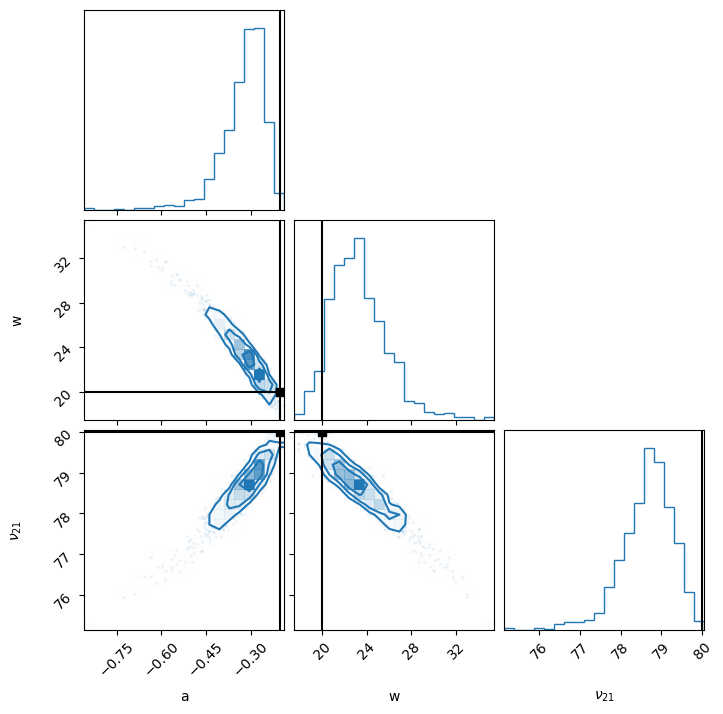

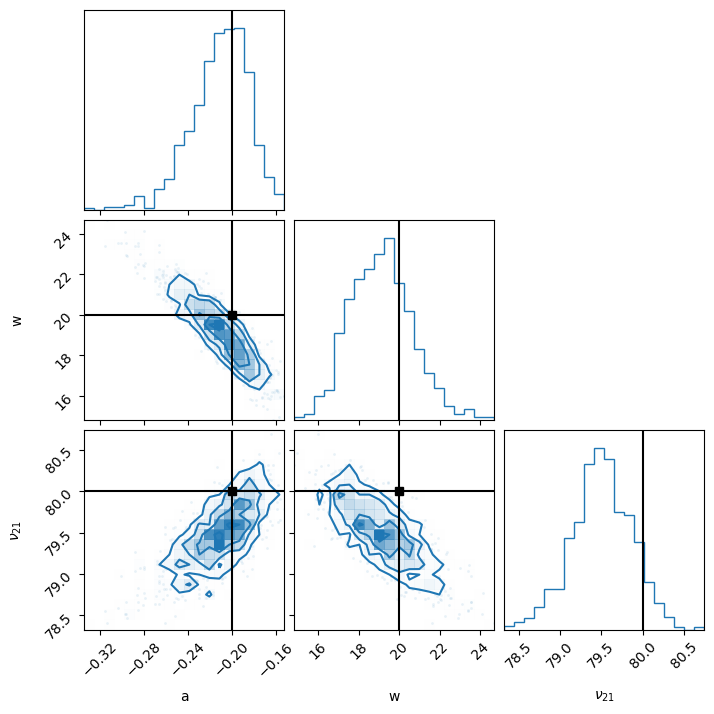

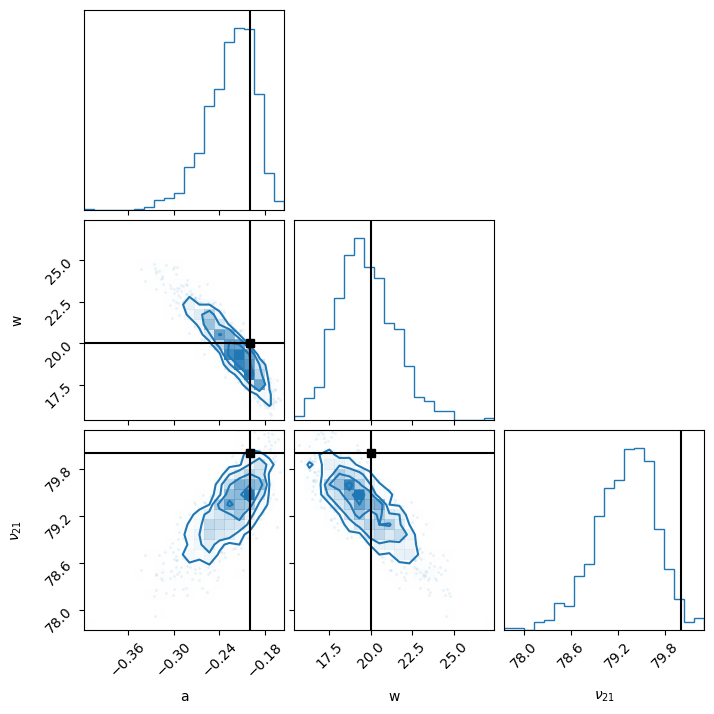

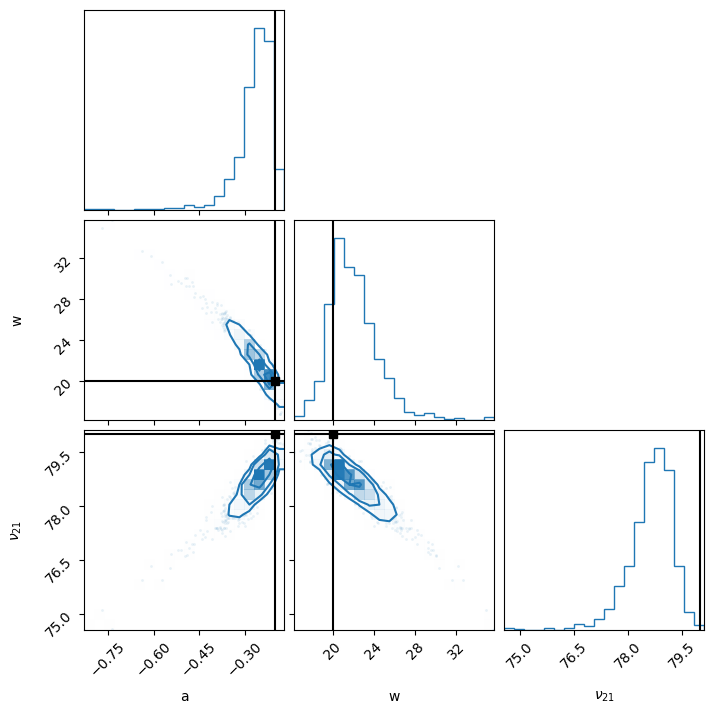

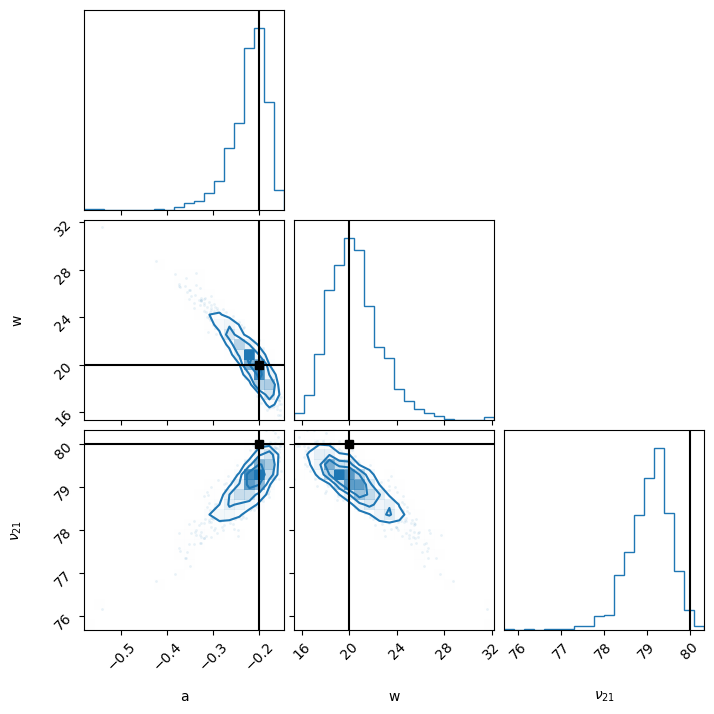

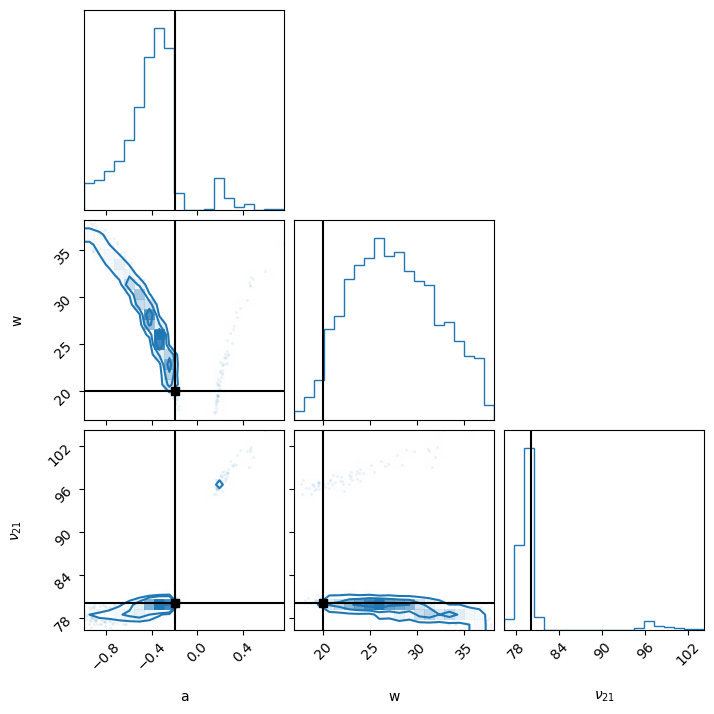

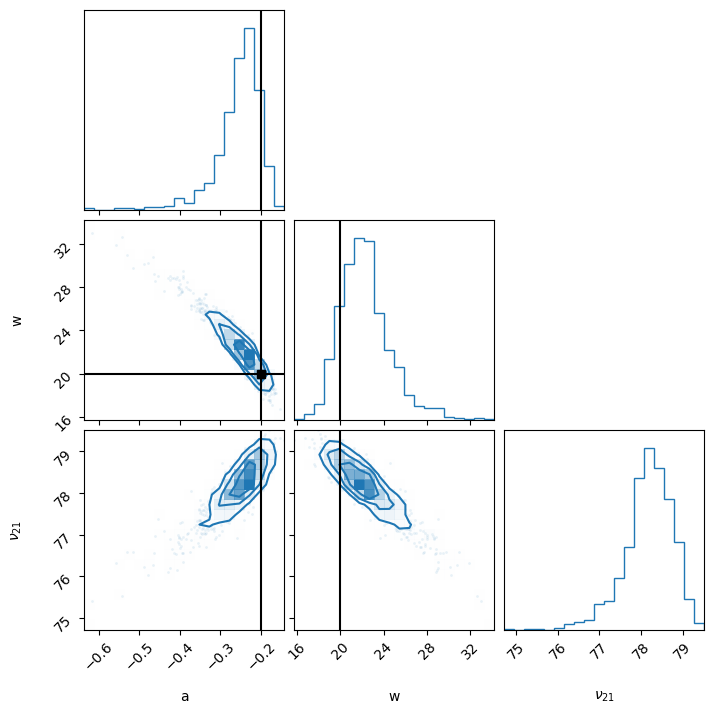

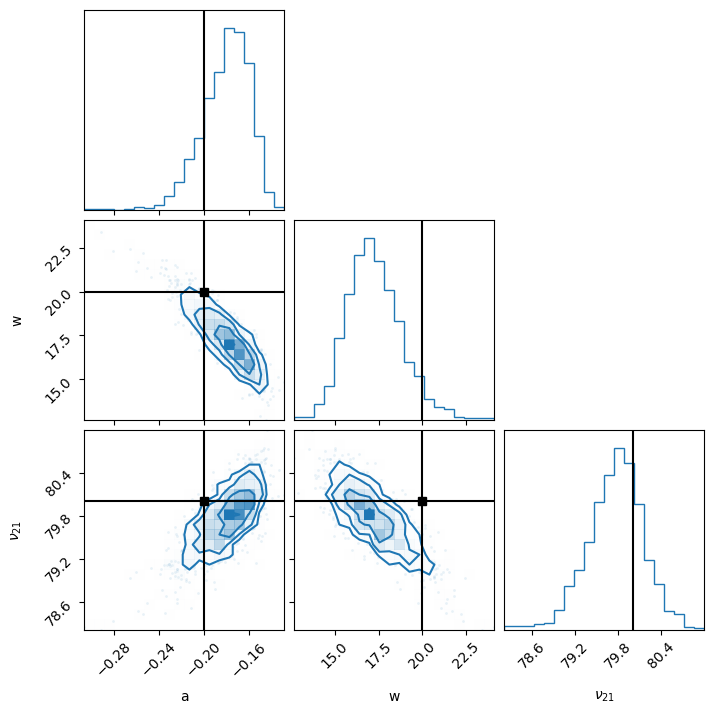

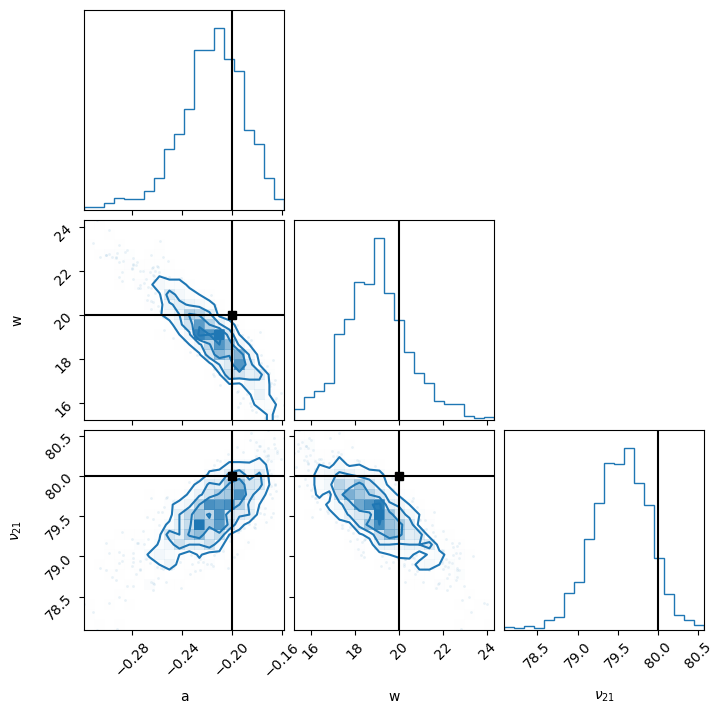

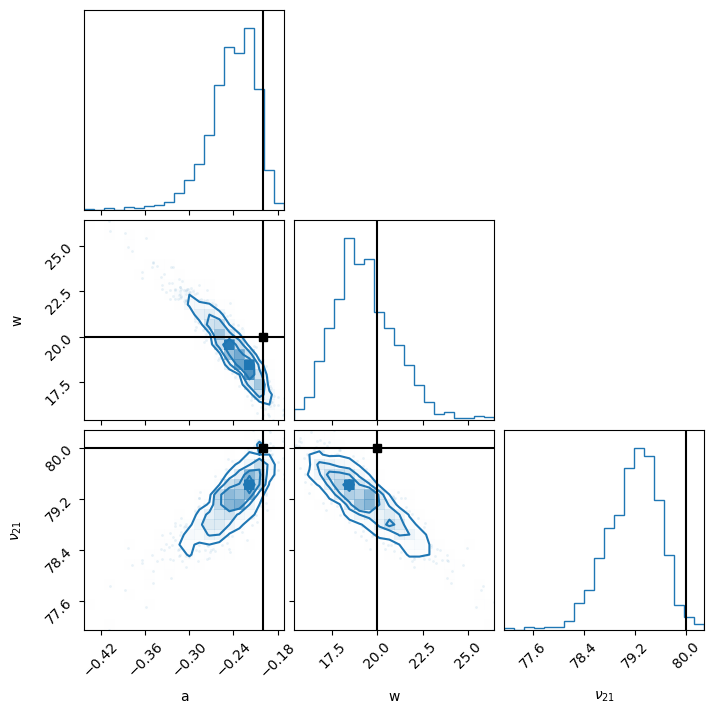

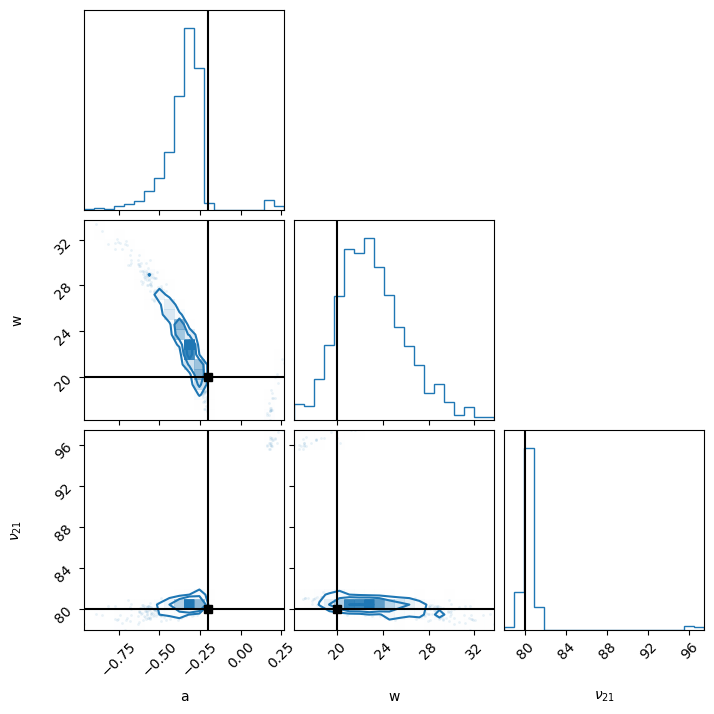

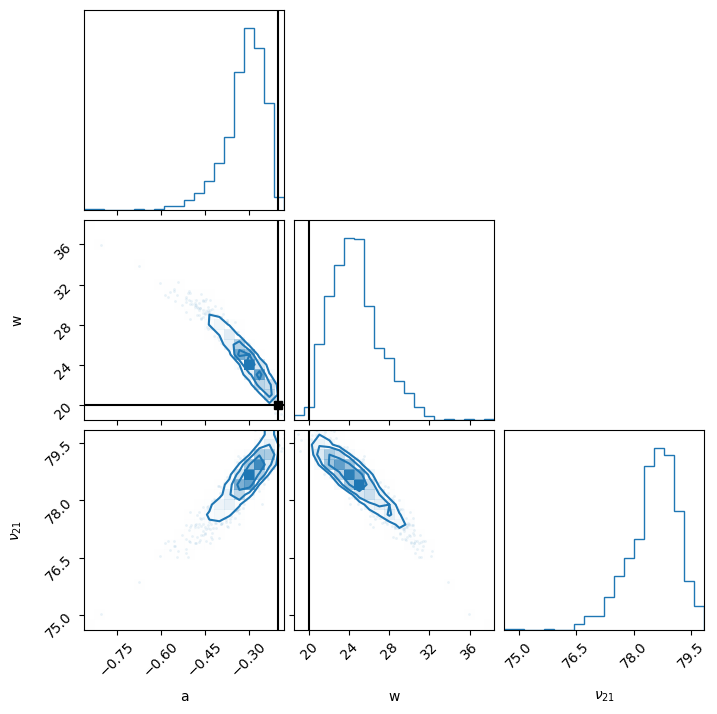

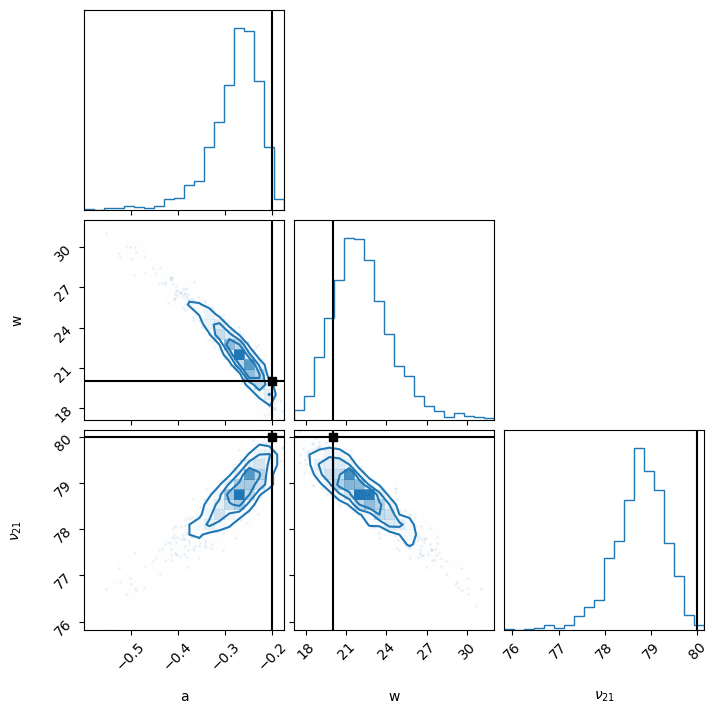

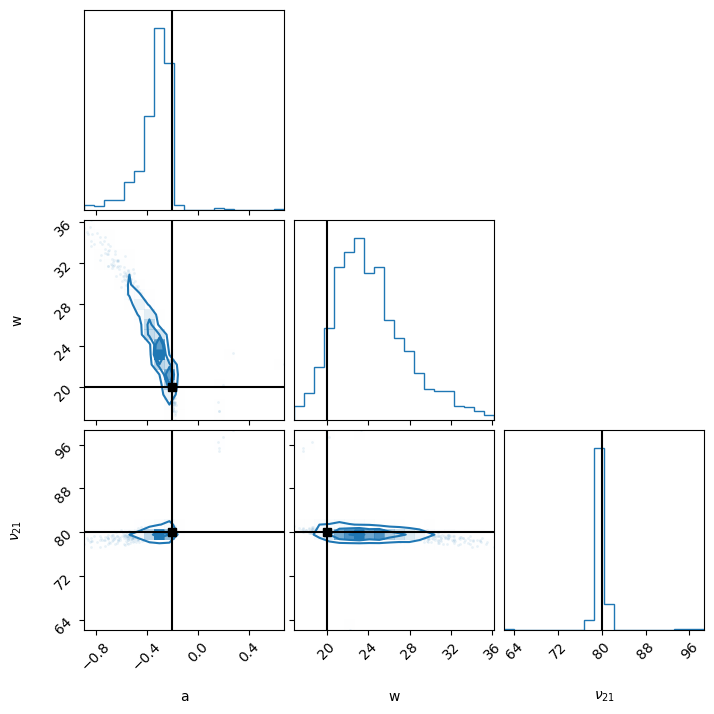

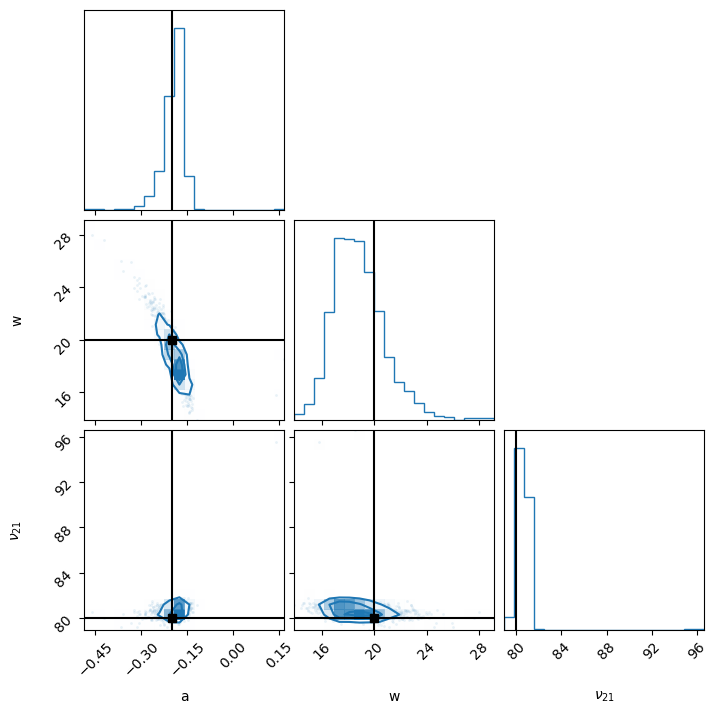

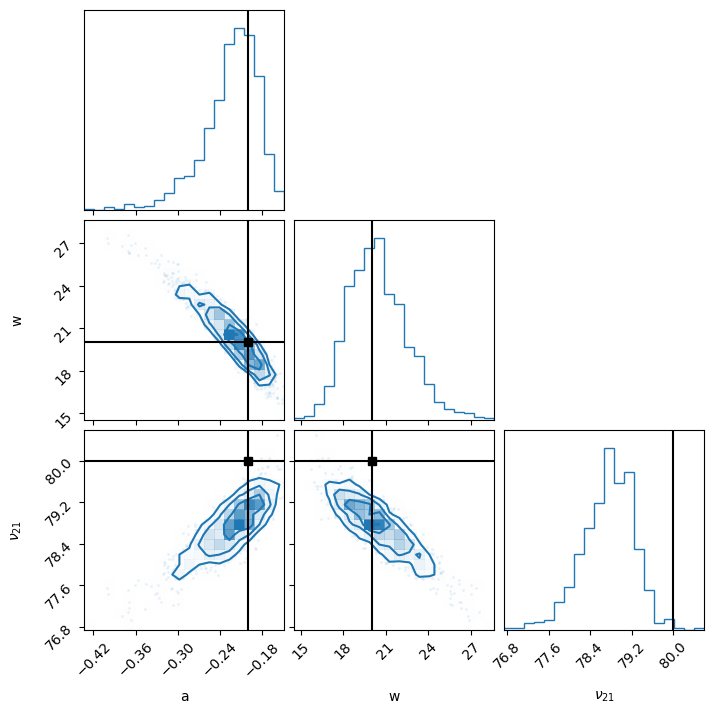

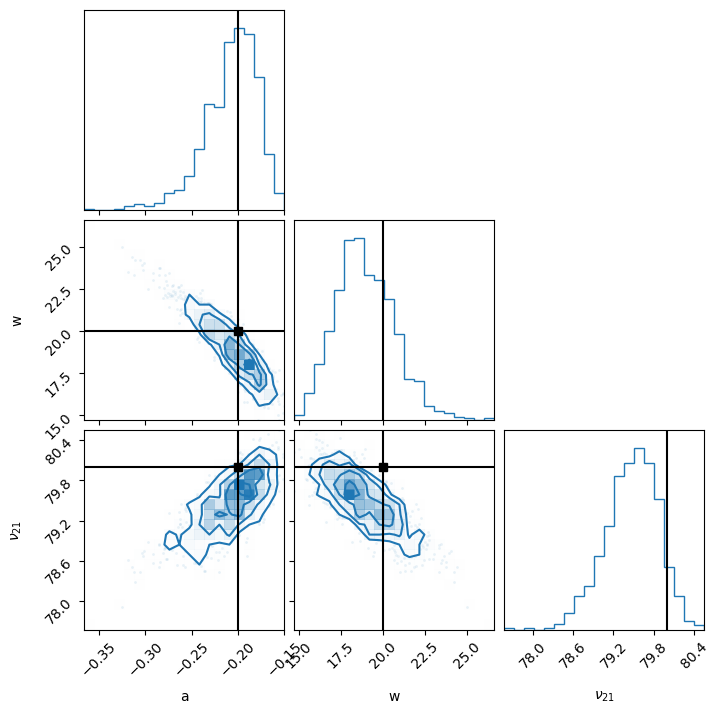

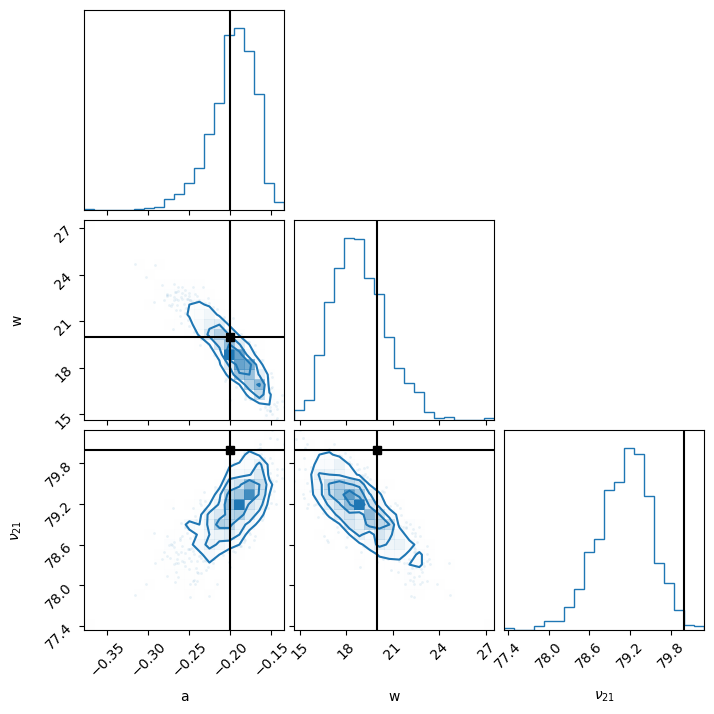

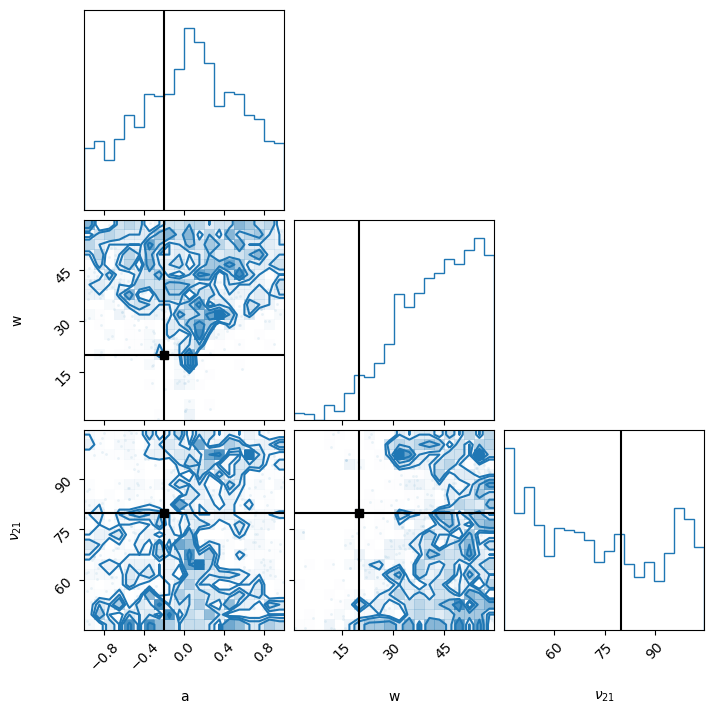

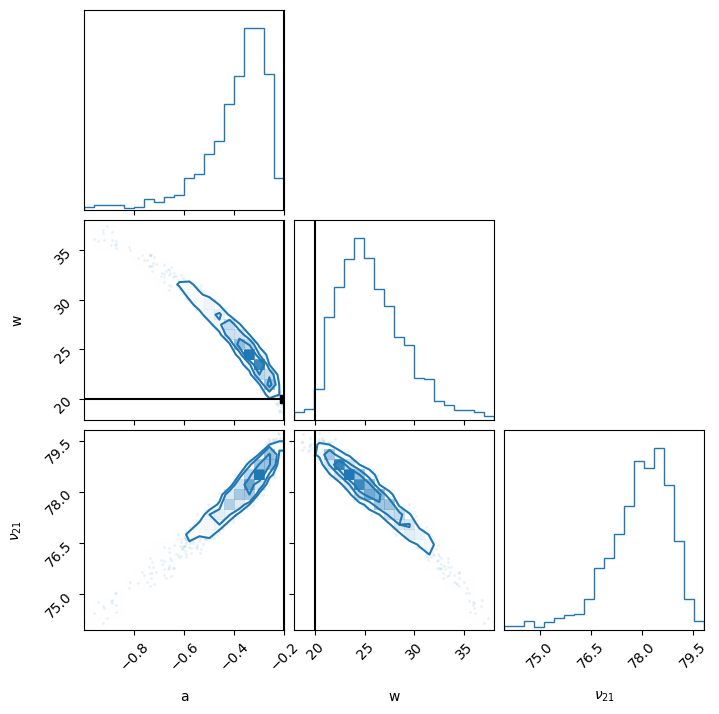

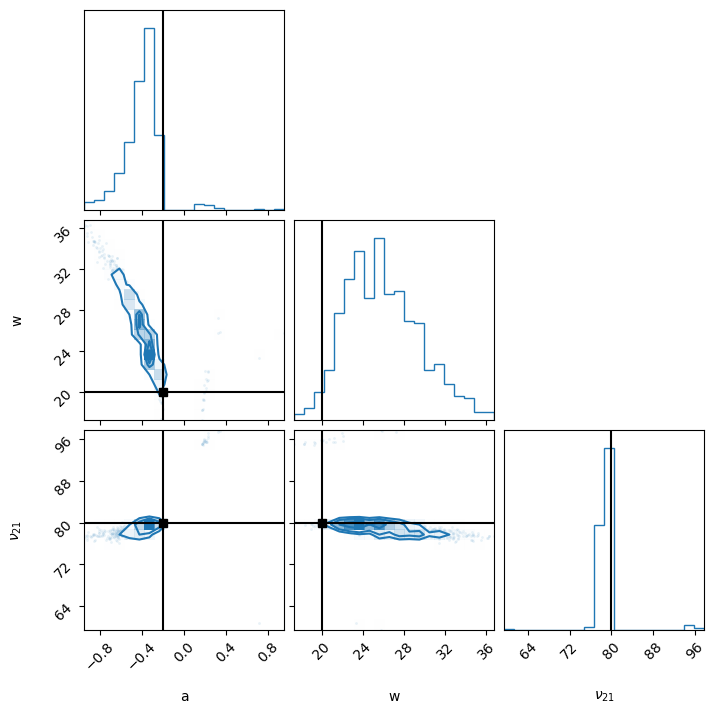

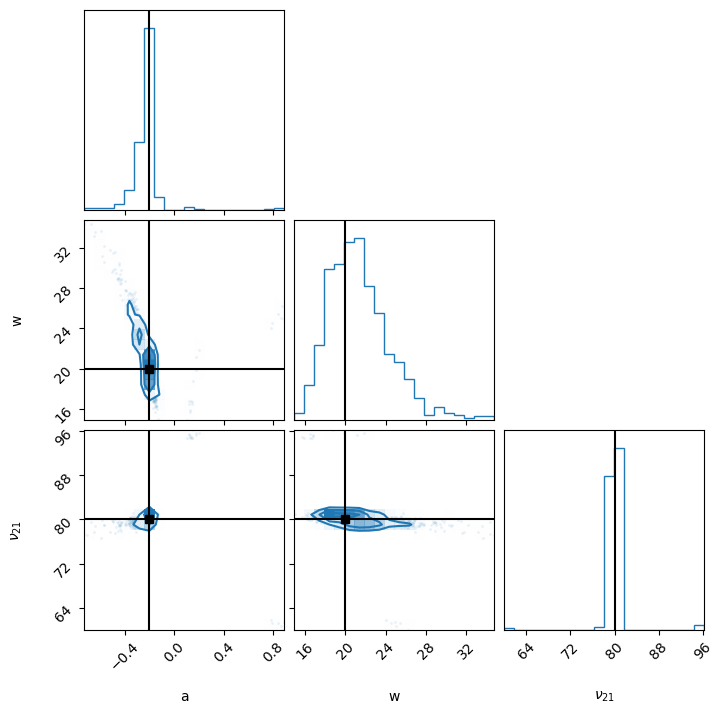

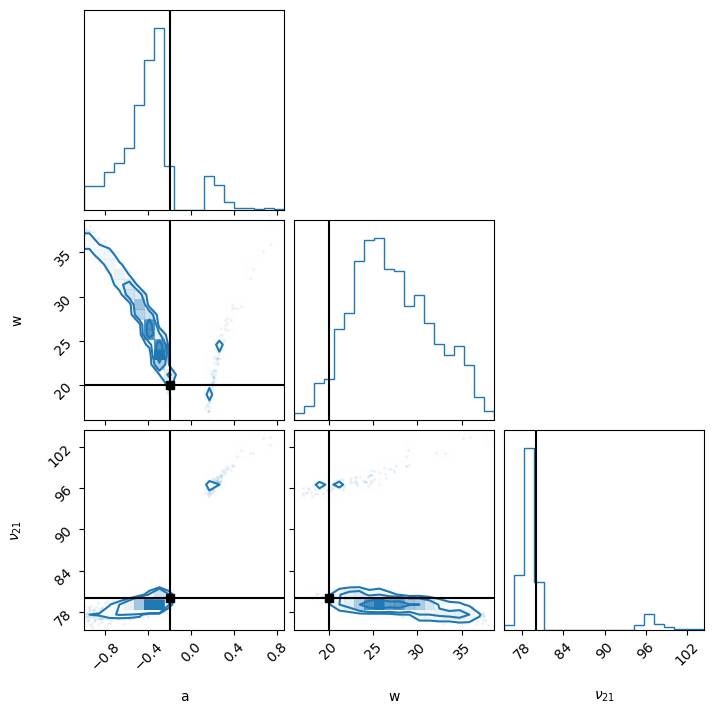

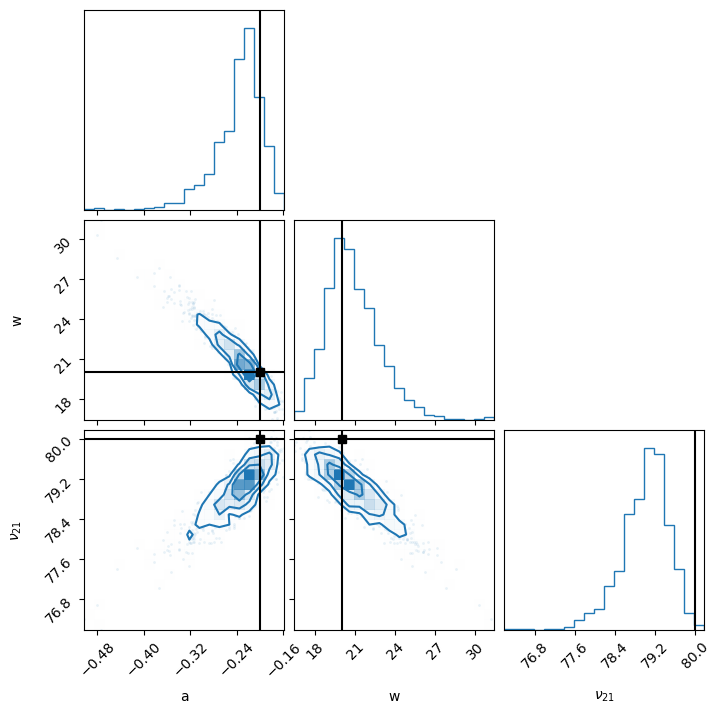

In [6]:
for i in range(len(results)):
    r = results[i][best[i]]
    plot(r)
    print_stats(r)
    print("------------")